# Exercise

Please refer to [Pytorch Notebook](https://www.learnpytorch.io/01_pytorch_workflow/#exercises) for detail

In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

torch.__version__

'2.0.1+cu118'

In [40]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [41]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 200, 2, device=device).unsqueeze(dim=1)

y = weight * X + bias

y.shape

torch.Size([100, 1])

In [42]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [43]:
def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
    if device == "cuda":
        train_data = train_data.cpu()
        train_label = train_label.cpu()
        test_data = test_data.cpu()
        test_label = test_label.cpu()
        if predictions != None:
            predictions = predictions.cpu()

    plt.figure(figsize=(10, 7))

    plt.plot(train_data, train_label, c="g", label="Train Data")
    plt.plot(test_data, test_label, c="b", label="Test Data")

    if predictions != None:
        plt.plot(test_data, predictions, c="r", label="Prediction")

    plt.legend()
    plt.show()


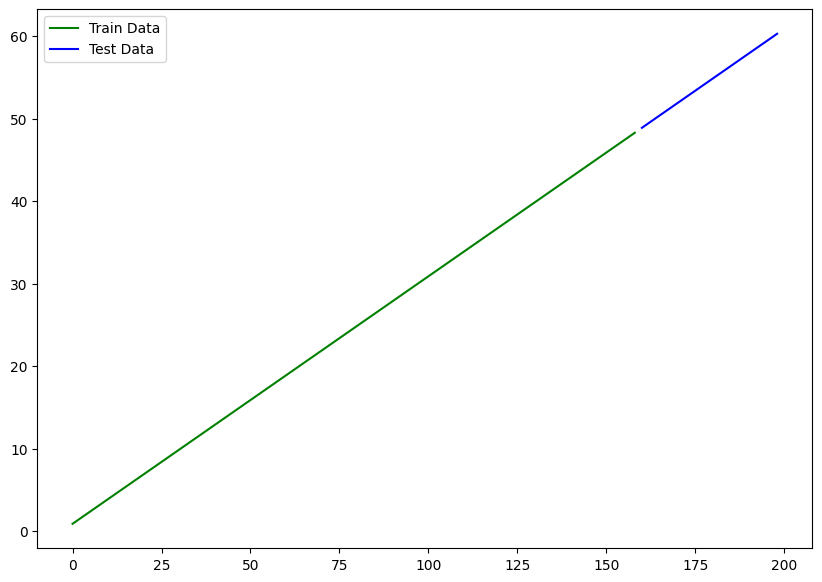

In [44]:
plot_predictions()

In [45]:
# Create a Linear regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                device=device))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                            requires_grad=True,
                                            device=device))

    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias


In [46]:
# Create a random seed
torch.manual_seed(7432)

# create an instance of model
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([-1.1996], device='cuda:0')),
             ('bias', tensor([-0.7292], device='cuda:0'))])

In [47]:
# Making Predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[-192.6627],
        [-195.0619],
        [-197.4610],
        [-199.8602],
        [-202.2594],
        [-204.6585],
        [-207.0577],
        [-209.4569],
        [-211.8560],
        [-214.2552],
        [-216.6544],
        [-219.0535],
        [-221.4527],
        [-223.8519],
        [-226.2511],
        [-228.6502],
        [-231.0494],
        [-233.4486],
        [-235.8477],
        [-238.2469]], device='cuda:0')

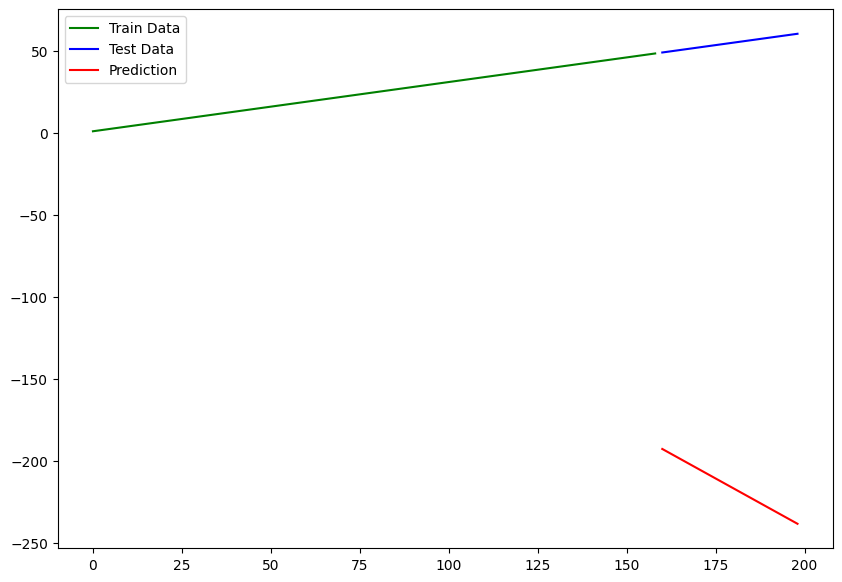

In [48]:
plot_predictions(predictions=y_preds.cpu())

In [49]:
# Setup loss function
loss_fn_0 = nn.L1Loss()

# Setup and optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [50]:
class Data:
    loss_record = []
    input_record = []
    test_record = []

    def __init__(self, name:str, d) -> None:
        self.name = name
        self.d = d

        if self.name == "loss":
            Data.loss_record.append(self.d)
        elif self.name == "input":
            Data.input_record.append(self.d)
        else:
            Data.test_record.append(self.d)

## Training

epochs = 1_000

for epoch in range(epochs):
    model_0.train()

    y_pred_0 = model_0(X_train)

    loss_0 = loss_fn_0(y_pred_0, y_train)

    optimizer.zero_grad()

    loss_0.backward()

    optimizer.step()

    # Sending Data
    Data(name="loss", d=loss_0.item())
    Data(name="input", d=epoch)

    model_0.eval()

    with torch.inference_mode():
        y_pred_test_0 = model_0(X_test)
        Data(name="test", d=y_pred_test_0)

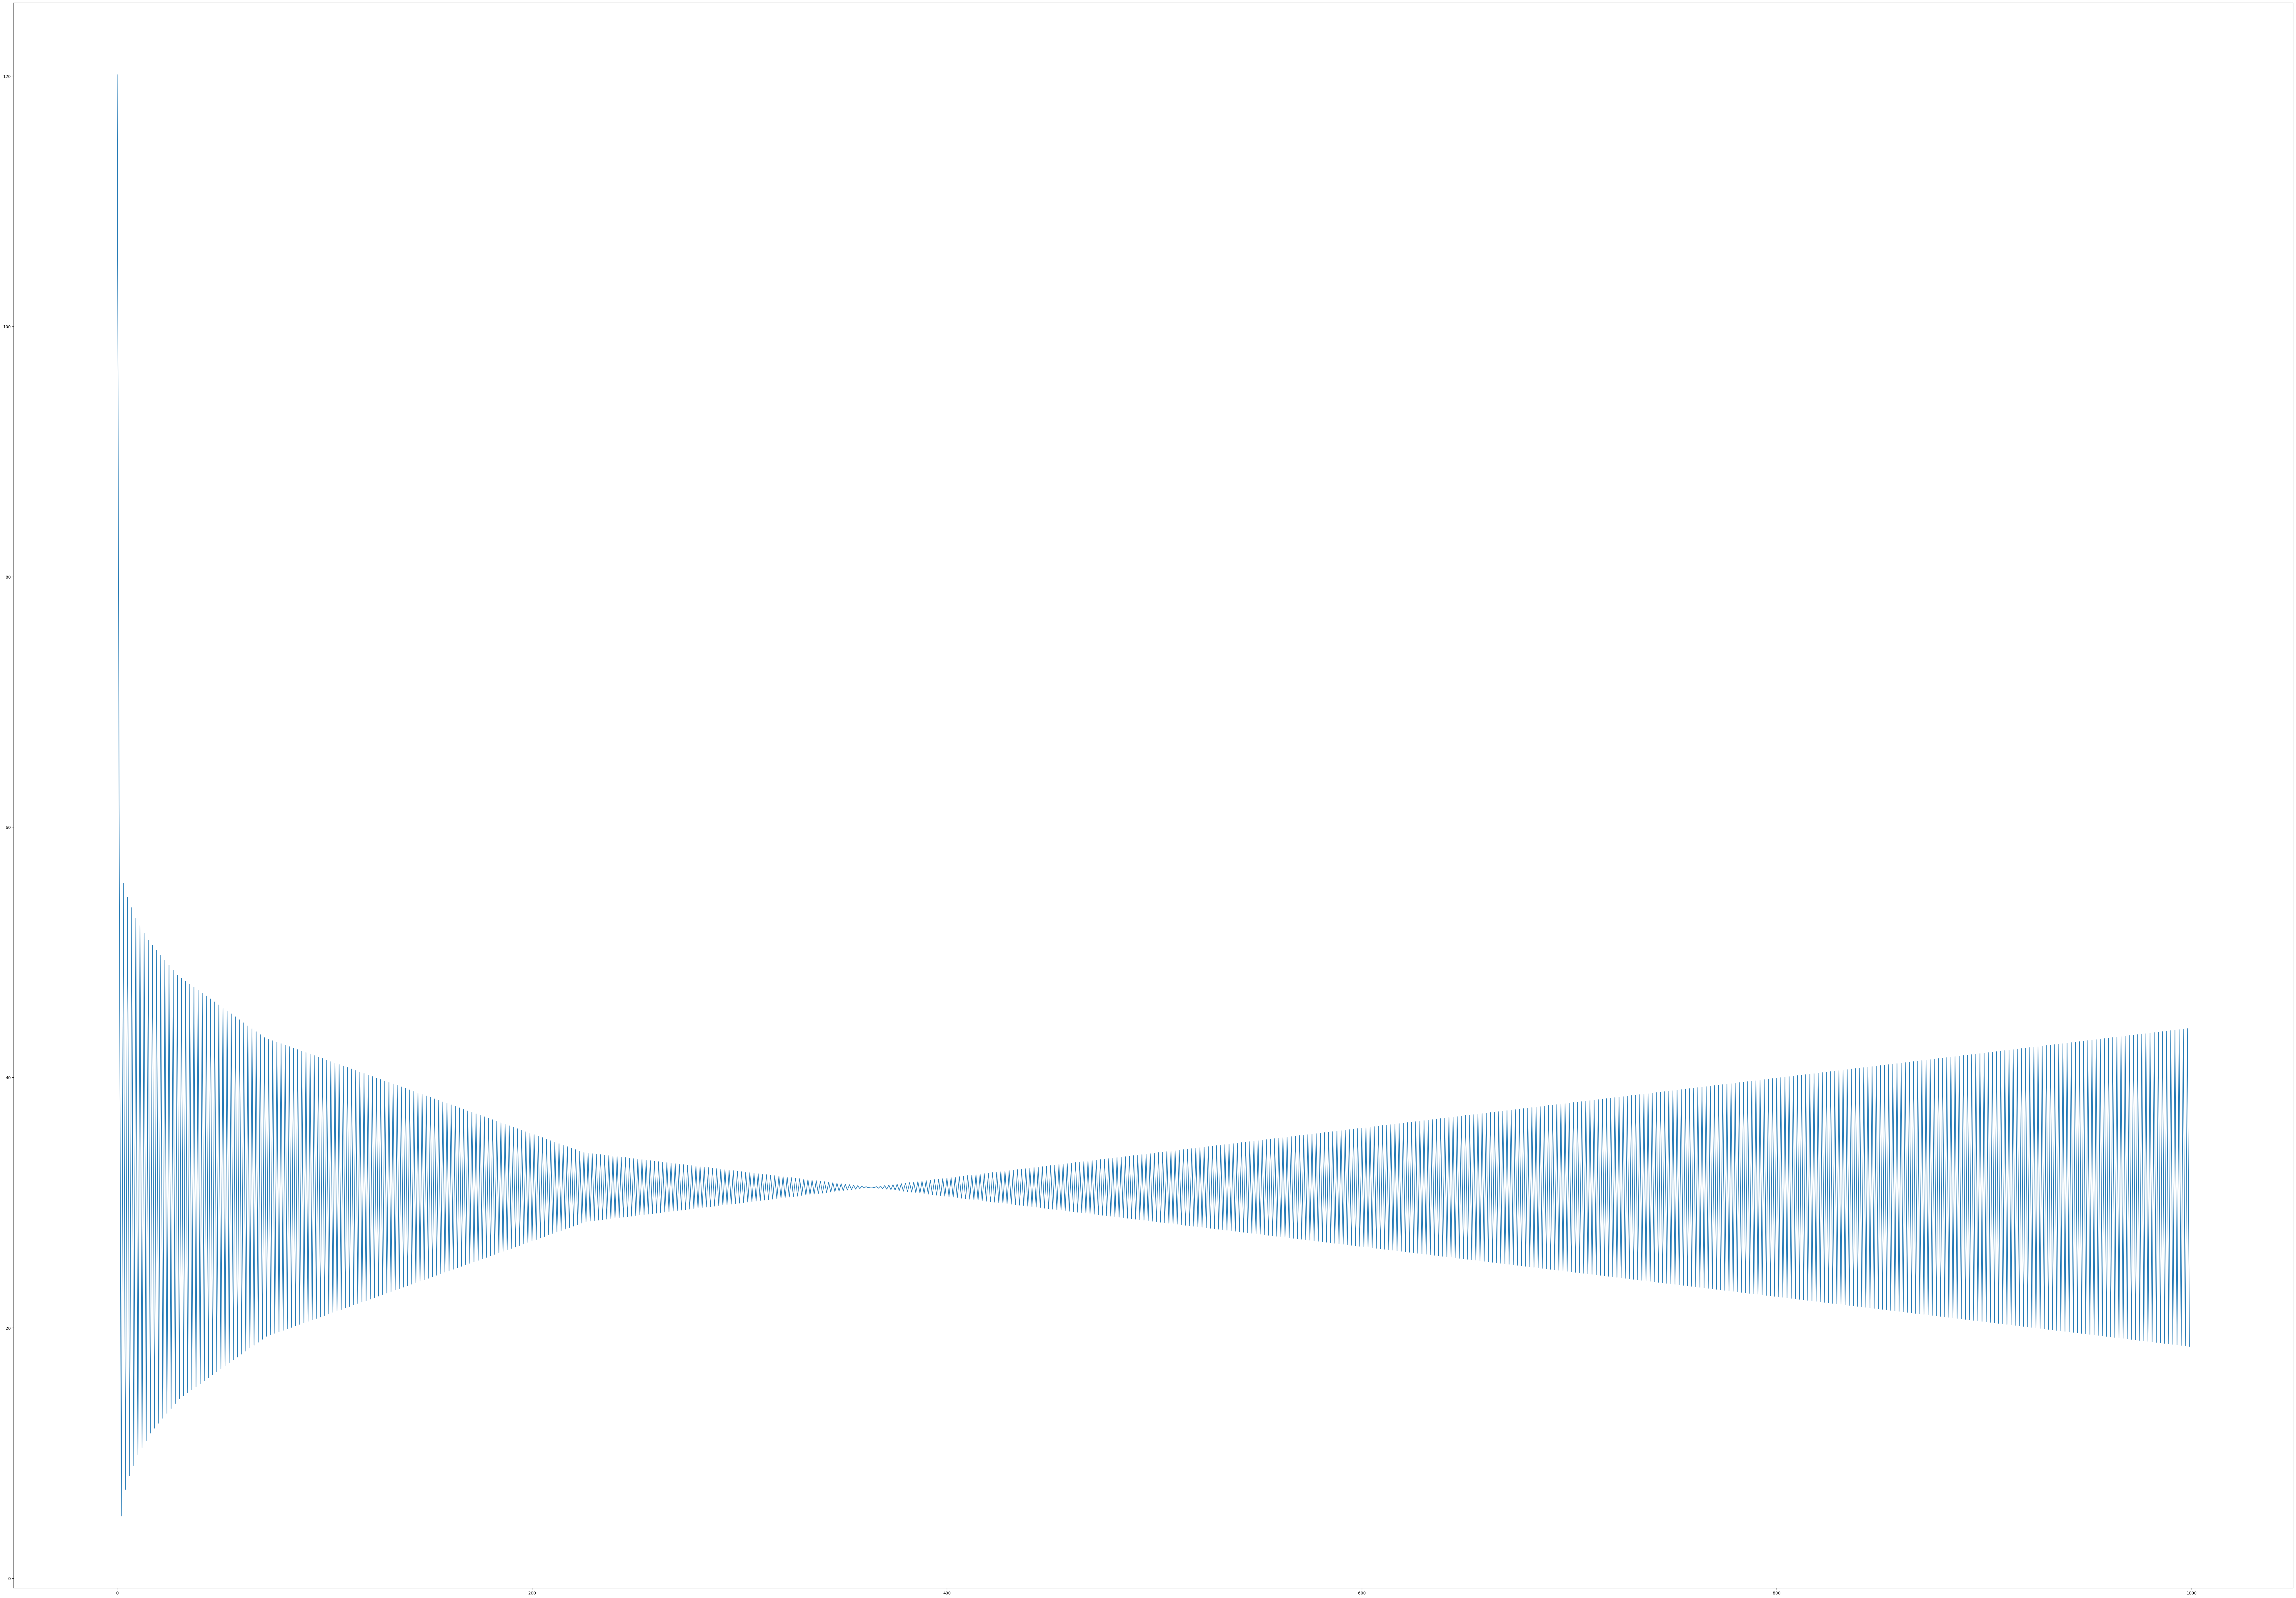

In [51]:
# Analysing Loss function

plt.figure(figsize=(100, 70))

plt.plot(Data.input_record, Data.loss_record)

plt.show()

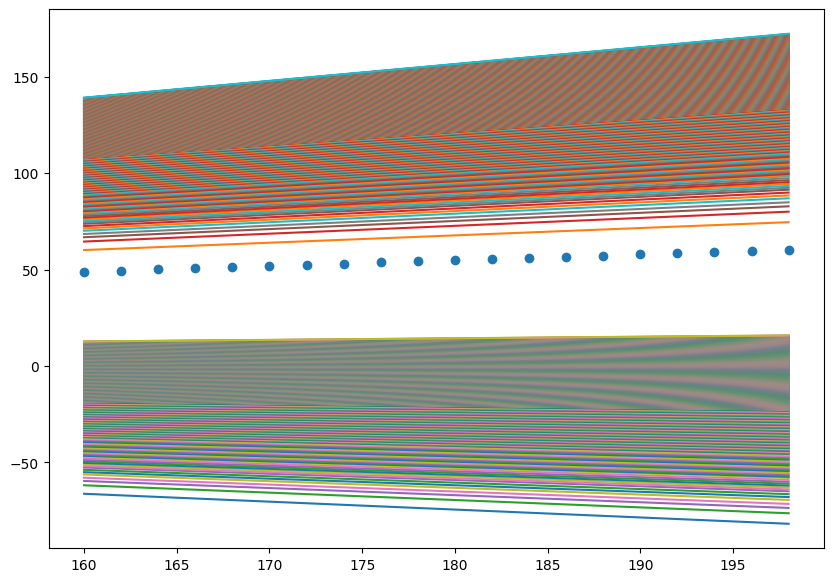

In [52]:
# Analysing tests
plt.figure(figsize=(10, 7))

if device == "cuda":
    x_test = X_test.cpu()
    _y_test = y_test.cpu()

for test in Data.test_record:
    if device == "cuda":
        test = test.cpu().numpy()

    plt.plot(x_test, test)

# Ideal Predictions
plt.scatter(x_test, _y_test)

plt.show()

In [53]:
# Identifying lowest loss
loss_record_numpy = np.array(Data.loss_record)
loss_record_tensor = torch.from_numpy(loss_record_numpy)

min_loss = loss_record_tensor.argmin()

epoch_required = Data.input_record[min_loss]

epoch_required

2

In [54]:
# Creating an final model
torch.manual_seed(7432)
model_1 = LinearRegressionModel()

model_1.state_dict()

loss_fn_1 = nn.L1Loss()

optimizer_1 = torch.optim.SGD(params=model_1.parameters(),
                              lr=0.01)

In [55]:
# Looping and training untill desired epoch

for ep in range(epoch_required):
    model_1.train()

    y_pred_1 = model_1(X_train)

    loss_1 = loss_fn_1(y_pred_1, y_train)

    optimizer_1.zero_grad()

    loss_1.backward()

    optimizer_1.step()

    model_1.eval()

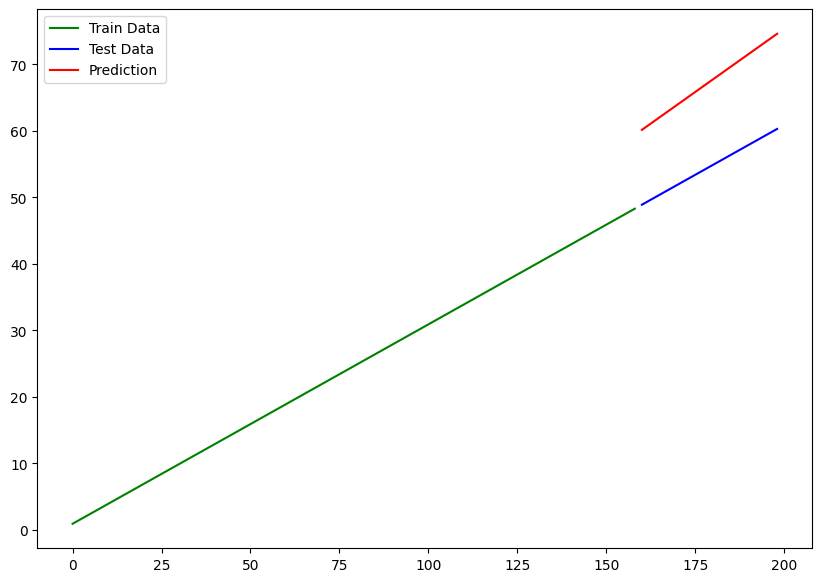

In [56]:
# Analysing final model
with torch.inference_mode():
    y_pred_test_1 = model_1(X_test)

plot_predictions(predictions=y_pred_test_1)